## CS 4661 Project
# Predicting Stock Market Prices
Members: Nshan Kazaryan, Bailey Canham, Ly Jacky Nhiayi, Asahel Monroy

In [9]:
# import necessary tools
import numpy as np
import pandas as pd
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt



In [10]:
# read csv file
stock_df = pd.read_csv("https://raw.githubusercontent.com/LyJacky/stocks/4802f4e0f139ee0568afbad309086d90c78a53b7/all_stocks_5yr.csv")
import datetime as dt
stock_df['date'] = pd.to_datetime(stock_df['date'])
stock_df['date']=stock_df['date'].map(dt.datetime.toordinal)
# gets the top 10 stocks in alphabetical order
# stock_df_top10 sstock_df_aal = stock_df[0:1259]tock_df[0:12590]

In [11]:
# stock_df_top10[::1259]
# stock_df['date']=stock_df['date'].map(dt.datetime.fromordinal)
# import pandas_ta


stock_df_aal = stock_df[0:1259]
stock_df_aal.pop("open")
stock_df_aal.pop("low")
stock_df_aal.pop("high")
stock_df_aal.pop("volume")
# stock_df_aal.ta.ema(close='close', length=10, append=True)
stock_df_aal.insert(0,"weekly_avg", " ")
stock_df_aal.insert(0,"30_entry_avg", " ")
stock_df_aal.insert(0,"50_entry_avg", " ")
stock_df_aal.insert(0,"100_entry_avg", " ")
stock_df_aal

,100_entry_avg,50_entry_avg,30_entry_avg,weekly_avg,date,close,Name
0,,,,,734907,14.75,AAL
1,,,,,734910,14.46,AAL
2,,,,,734911,14.27,AAL
3,,,,,734912,14.66,AAL
4,,,,,734913,13.99,AAL
...,...,...,...,...,...,...,...
1254,,,,,736726,53.88,AAL
1255,,,,,736727,52.10,AAL
1256,,,,,736730,49.76,AAL
1257,,,,,736731,51.18,AAL


In [12]:
print(stock_df["close"][1:7].mean())
stock_df["close"][0:7]
stock_df

14.356666666666667


,date,open,high,low,close,volume,Name
0,734907,15.07,15.12,14.63,14.75,8407500,AAL
1,734910,14.89,15.01,14.26,14.46,8882000,AAL
2,734911,14.45,14.51,14.10,14.27,8126000,AAL
3,734912,14.30,14.94,14.25,14.66,10259500,AAL
4,734913,14.94,14.96,13.16,13.99,31879900,AAL
...,...,...,...,...,...,...,...
619035,736726,76.84,78.27,76.69,77.82,2982259,ZTS
619036,736727,77.53,78.12,76.73,76.78,2595187,ZTS
619037,736730,76.64,76.92,73.18,73.83,2962031,ZTS
619038,736731,72.74,74.56,72.13,73.27,4924323,ZTS


In [13]:
pd.options.mode.chained_assignment = None  # default='warn'
for x in range(8,1259):
    stock_df_aal["weekly_avg"][x] = stock_df_aal["close"][x-7-1:x-1].mean()
for x in range(31,1259):
    stock_df_aal["30_entry_avg"][x] = stock_df_aal["close"][x-30-1:x-1].mean()
for x in range(51,1259):
    stock_df_aal["50_entry_avg"][x] = stock_df_aal["close"][x-50-1:x-1].mean()
for x in range(101,1259):
    stock_df_aal["100_entry_avg"][x] = stock_df_aal["close"][x-100-1:x-1].mean()
stock_df_aal

,100_entry_avg,50_entry_avg,30_entry_avg,weekly_avg,date,close,Name
0,,,,,734907,14.75,AAL
1,,,,,734910,14.46,AAL
2,,,,,734911,14.27,AAL
3,,,,,734912,14.66,AAL
4,,,,,734913,13.99,AAL
...,...,...,...,...,...,...,...
1254,50.2197,52.1532,53.989,54.652857,736726,53.88,AAL
1255,50.3245,52.286,54.097667,54.112857,736727,52.10,AAL
1256,50.4273,52.4158,54.177333,53.482857,736730,49.76,AAL
1257,50.4897,52.504,54.199333,53.098571,736731,51.18,AAL


In [14]:
stock_df_aal = stock_df_aal[101:1259]
stock_df_aal

,100_entry_avg,50_entry_avg,30_entry_avg,weekly_avg,date,close,Name
101,16.2605,17.2224,17.116,16.388571,735054,16.84,AAL
102,16.2805,17.2314,17.076,16.477143,735057,16.94,AAL
103,16.3043,17.2392,17.039667,16.531429,735058,17.36,AAL
104,16.331,17.2536,16.998,16.641429,735059,17.17,AAL
105,16.358,17.269,16.969667,16.791429,735060,17.37,AAL
...,...,...,...,...,...,...,...
1254,50.2197,52.1532,53.989,54.652857,736726,53.88,AAL
1255,50.3245,52.286,54.097667,54.112857,736727,52.10,AAL
1256,50.4273,52.4158,54.177333,53.482857,736730,49.76,AAL
1257,50.4897,52.504,54.199333,53.098571,736731,51.18,AAL


<AxesSubplot:>

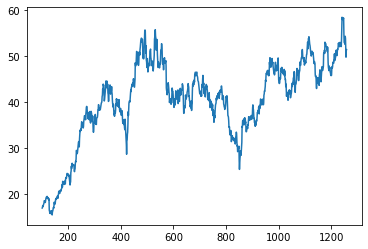

In [15]:
stock_df_aal.close.plot()

In [16]:
stock_df_aal.head()
feature_cols_1 = ["date","100_entry_avg","50_entry_avg","30_entry_avg","weekly_avg"]
feature_cols_2 = ["date","weekly_avg"]
feature_cols_3 = ["date","30_entry_avg"]
feature_cols_4 = ["date","100_entry_avg"]
feature_cols = ["date"]

# feature_cols = ["date","30_entry_avg"]


X_all = scale(stock_df_aal[feature_cols_1])
X_week = scale(stock_df_aal[feature_cols_2])
X_month = scale(stock_df_aal[feature_cols_3])
X_date_only = scale(stock_df_aal[feature_cols])
X_100 = scale(stock_df_aal[feature_cols_4])

y = stock_df_aal["close"]
# y = scale(stock_df_aal["close"])
# X = stock_df_aal[feature_cols]
# y.plot()
# X

In [17]:
import math
s_f = .6
n_train = math.floor(s_f * X_all.shape[0])
n_test = math.ceil((1-s_f) * X_all.shape[0])

X_train_all = X_all[:n_train]
y_train_all = y[:n_train]
X_test_all = X_all[n_train:]
y_test_all = y[n_train:]


X_train_week = X_week[:n_train]
y_train_week = y[:n_train]
X_test_week = X_week[n_train:]
y_test_week = y[n_train:]

X_train_month = X_month[:n_train]
y_train_month = y[:n_train]
X_test_month = X_month[n_train:]
y_test_month = y[n_train:]

X_train_date_only = X_date_only[:n_train]
y_train_date_only = y[:n_train]
X_test_date_only = X_date_only[n_train:]
y_test_date_only = y[n_train:]

X_train_100 = X_100[:n_train]
y_train_100 = y[:n_train]
X_test_100 = X_100[n_train:]
y_test_100 = y[n_train:]


In [26]:
# import linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, 
#                                                     random_state=3)

linear_regression_all = LinearRegression()
linear_regression_week = LinearRegression()
linear_regression_month = LinearRegression()
linear_regression_100 = LinearRegression()
linear_regression_date = LinearRegression()

linear_regression_all.fit(X_train_all,y_train_all)
y_predict_all = linear_regression_all.predict(X_test_all)
mse_list = cross_val_score(linear_regression_all, X_test_all, y_test_all, cv=10, scoring='neg_mean_squared_error')
mse_list_positive = -mse_list
rmse_list = np.sqrt(mse_list_positive)
print("Displaying mse list, rmse list, and avg rsme for linear regression trained with all features")
print("MSE LIST:")
print(mse_list)
print("RMSE LIST:")
print(rmse_list)
print("RMSE LIST MEAN:")
print(rmse_list.mean())
print("- - - - - - - - - - - - - - - - - - - - - - - - - -  - - - - - - - - - - - - - - - -")


linear_regression_week.fit(X_train_week,y_train_week)
y_predict_week = linear_regression_week.predict(X_test_week)
mse_list = cross_val_score(linear_regression_week, X_test_week, y_test_week, cv=10, scoring='neg_mean_squared_error')
mse_list_positive = -mse_list
rmse_list = np.sqrt(mse_list_positive)

print("Displaying mse list, rmse list, and avg rsme for linear regression trained with only week avg/date features")
print("MSE LIST:")
print(mse_list)
print("RMSE LIST:")
print(rmse_list)
print("RMSE LIST MEAN:")
print(rmse_list.mean())
print("- - - - - - - - - - - - - - - - - - - - - - - - - -  - - - - - - - - - - - - - - - -")


linear_regression_month.fit(X_train_month,y_train_month)
y_predict_month = linear_regression_month.predict(X_test_month)
mse_list = cross_val_score(linear_regression_month, X_test_month, y_test_month, cv=10, scoring='neg_mean_squared_error')
mse_list_positive = -mse_list
rmse_list = np.sqrt(mse_list_positive)
print("Displaying mse list, rmse list, and avg rsme for linear regression trained with only month avg/date features")
print("MSE LIST:")
print(mse_list)
print("RMSE LIST:")
print(rmse_list)
print("RMSE LIST MEAN:")
print(rmse_list.mean())
print("- - - - - - - - - - - - - - - - - - - - - - - - - -  - - - - - - - - - - - - - - - -")


linear_regression_date.fit(X_train_date_only,y_train_date_only)
y_predict_date = linear_regression_date.predict(X_test_date_only)
mse_list = cross_val_score(linear_regression_date, X_test_date_only, y_test_all, cv=10, scoring='neg_mean_squared_error')
mse_list_positive = -mse_list
rmse_list = np.sqrt(mse_list_positive)
print("Displaying mse list, rmse list, and avg rsme for linear regression trained with only date feature")
print("MSE LIST:")
print(mse_list)
print("RMSE LIST:")
print(rmse_list)
print("RMSE LIST MEAN:")
print(rmse_list.mean())
print("- - - - - - - - - - - - - - - - - - - - - - - - - -  - - - - - - - - - - - - - - - -")

linear_regression_100.fit(X_train_100,y_train_100)
y_predict_100 = linear_regression_100.predict(X_test_100)
mse_list = cross_val_score(linear_regression_100, X_test_100, y_test_100, cv=10, scoring='neg_mean_squared_error')
mse_list_positive = -mse_list
rmse_list = np.sqrt(mse_list_positive)
# rmse_list = np.sqrt(mse_list_positive)
# rmspe = (np.sqrt(np.mean(np.square((y_true - y_pred) / y_true)))) * 100
print("Displaying mse list, rmse list, and avg rsme for linear regression trained with only date and avg 100 days features")
print("MSE LIST:")
print(mse_list)
print("RMSE LIST:")
print(rmse_list)
print("RMSE LIST MEAN:")
print(rmse_list.mean())
print("- - - - - - - - - - - - - - - - - - - - - - - - - -  - - - - - - - - - - - - - - - -")

Displaying mse list, rmse list, and avg rsme for linear regression trained with all features
MSE LIST:
[-2.70285799 -5.79207302 -2.71101908 -2.57239394 -2.56458135 -2.8061563
 -2.8169064  -2.55197269 -4.58891259 -5.02578239]
RMSE LIST:
[1.6440371  2.4066726  1.64651726 1.60386843 1.60143103 1.67515859
 1.6783642  1.5974895  2.14217473 2.24182568]
RMSE LIST MEAN:
1.8237539131326568
- - - - - - - - - - - - - - - - - - - - - - - - - -  - - - - - - - - - - - - - - - -
Displaying mse list, rmse list, and avg rsme for linear regression trained with only week avg/date features
MSE LIST:
[-3.7711372  -5.14033946 -1.57879733 -3.80834436 -2.17096013 -2.90050542
 -2.78314146 -3.21313554 -3.52994608 -5.02034119]
RMSE LIST:
[1.94194161 2.26723167 1.25650202 1.95149798 1.47341784 1.70308703
 1.668275   1.79252212 1.87881507 2.24061179]
RMSE LIST MEAN:
1.817390212019152
- - - - - - - - - - - - - - - - - - - - - - - - - -  - - - - - - - - - - - - - - - -
Displaying mse list, rmse list, and avg rsme fo

In [19]:
y_test_all=y_test_all.reset_index(drop=True)
y_test_all


0      38.36
1      38.50
2      38.73
3      39.19
4      39.94
       ...  
459    53.88
460    52.10
461    49.76
462    51.18
463    51.40
Name: close, Length: 464, dtype: float64

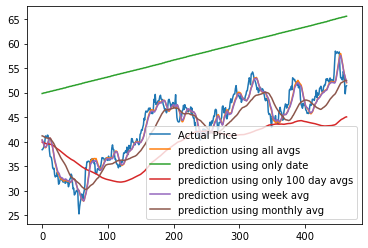

In [20]:
plt.plot(y_test_all,label="Actual Price")
plt.plot(y_predict_all, label="prediction using all avgs")
plt.plot(y_predict_date, label="prediction using only date")
plt.plot(y_predict_100, label="prediction using only 100 day avgs")
plt.plot(y_predict_week, label="prediction using week avg")
plt.plot(y_predict_month, label="prediction using monthly avg")
leg = plt.legend()
plt.show()

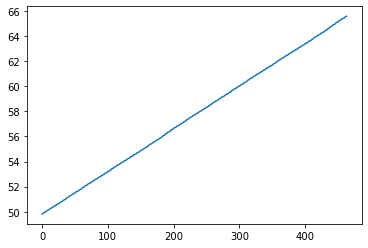

In [21]:
plt.plot(y_predict_date)

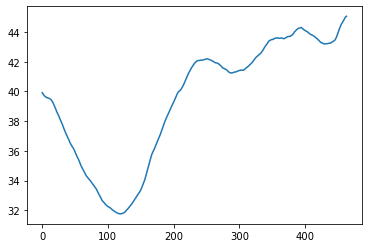

In [22]:
plt.plot(y_predict_100)

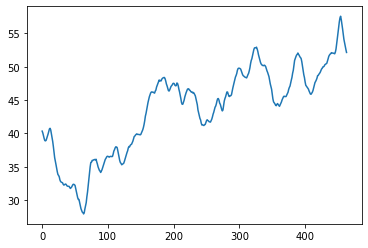

In [23]:
plt.plot(y_predict_week)

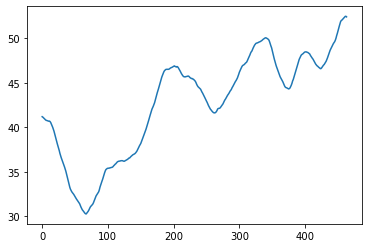

In [24]:
plt.plot(y_predict_month)

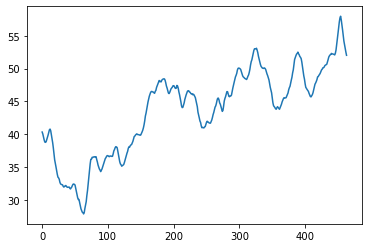

In [25]:
plt.plot(y_predict_all)